<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Откройте-файл-с-данными-и-изучите-общую-информацию" data-toc-modified-id="Откройте-файл-с-данными-и-изучите-общую-информацию-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Откройте файл с данными и изучите общую информацию</a></span></li><li><span><a href="#Выполните-предобработку-данных" data-toc-modified-id="Выполните-предобработку-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Выполните предобработку данных</a></span></li><li><span><a href="#Добавьте-в-таблицу-новые-столбцы" data-toc-modified-id="Добавьте-в-таблицу-новые-столбцы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавьте в таблицу новые столбцы</a></span></li><li><span><a href="#Проведите-исследовательский-анализ-данных" data-toc-modified-id="Проведите-исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проведите исследовательский анализ данных</a></span></li><li><span><a href="#Напишите-общий-вывод" data-toc-modified-id="Напишите-общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Напишите общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
В данном проекте нам нужно научиться определять рыночную стоимость объектов недвижимости. 
Для этого проведем:

+ Исследовательский анализ данных и установим параметры, влияющие на цену объектов. 

+ Построим автоматизированную систему: она отследит аномалии либо неактуальные данные.


По каждой квартире на продажу доступны два вида данных. 
- Вписаные пользователем
- Получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
# загрузка библиотек

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# загрузка датасета

data = pd.read_csv('C:\\Users\\A.Urazimbetov\\OneDrive\\Проекты на гит\\Untitled Folder\\real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

При первичном просмотре данных, можно заметить, что большинство пропусков скорее связаны с тем, что:
    
 - Пользователи могут пропускать поля для ввода информации.
 - В следствии причины 1, автоматически не получается получить данные.

Для решения этой проблемы следует сделать некоторые поля обязательными либо выбирать значения из выпадающего списка/фильтра.

In [5]:
col = data.columns.values.tolist()
for i in col:
    if data[i].isna().sum() > 0:
        print(f'В колонке {i} нашего датафрейма - {data[i].isna().sum()} пропушенных значений')

В колонке ceiling_height нашего датафрейма - 9195 пропушенных значений
В колонке floors_total нашего датафрейма - 86 пропушенных значений
В колонке living_area нашего датафрейма - 1903 пропушенных значений
В колонке is_apartment нашего датафрейма - 20924 пропушенных значений
В колонке kitchen_area нашего датафрейма - 2278 пропушенных значений
В колонке balcony нашего датафрейма - 11519 пропушенных значений
В колонке locality_name нашего датафрейма - 49 пропушенных значений
В колонке airports_nearest нашего датафрейма - 5542 пропушенных значений
В колонке cityCenters_nearest нашего датафрейма - 5519 пропушенных значений
В колонке parks_around3000 нашего датафрейма - 5518 пропушенных значений
В колонке parks_nearest нашего датафрейма - 15620 пропушенных значений
В колонке ponds_around3000 нашего датафрейма - 5518 пропушенных значений
В колонке ponds_nearest нашего датафрейма - 14589 пропушенных значений
В колонке days_exposition нашего датафрейма - 3181 пропушенных значений


### Выполните предобработку данных

In [6]:
# обработка ошибок в ceiling_height

data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] /= 10
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data = data[(data['ceiling_height'] <= 3.5) & (data['ceiling_height'] >= 2.5)]

In [7]:
# обработка ошибок в столбце floors_total

data = data[data['floors_total'] < 35]
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

In [8]:
### обработка ошибок в living_area и kitchen area
# замена идет соотношению к общей площади к площади кухни и жилой площади



data_area = data[['total_area', 'living_area', 'kitchen_area']]
data_area = data_area.dropna()
total_area = data_area['total_area'].sum()
total_livivng_area = data_area['living_area'].sum()
total_kitchen_area = data_area['kitchen_area'].sum()

def kitchen_miss(row):
    if pd.isna(row['kitchen_area']):
        return row['total_area'] * (total_kitchen_area / total_area)
    else:
        return row['kitchen_area']
data['kitchen_area'] = data.apply(kitchen_miss, axis=1)

def living_miss (row):
    if pd.isna(row['living_area']):
        return row['total_area'] * (total_livivng_area / total_area)
    else:
        return row['living_area']
    
data['living_area'] = data.apply(living_miss, axis=1)

In [9]:
# обработка пропусков в столбце is_apartment
data['is_apartment'] = data['is_apartment'].fillna(False)

In [10]:
# обработка ошибок в balcony
data['balcony'] = data['balcony'].fillna(0) 

In [11]:
# обработка ошибок в locality_name

data['locality_name'] = data['locality_name'].astype(str)
data = data.loc[data['locality_name']!="nan"]
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок'], 'посёлок', regex=True)
)

# Удаленние неявных дубликатов, для этого добавил 2 колонки, где просто имя и тип населенного пункта
# Сделал по нему словарь, для того чтобы где ключ имя и значение самое длинный тип населенного пункта
# По этим ключам перезаписал тип начеленного пункта
# Перезаписал столбец locality_name (loc_name + loc_type)
# так же оставил loc_name и loc_type 



def loc_names(row):
    name = row['locality_name']
    loc_nam = name.split()
    loc_name = ""
    for x in loc_nam:
        if x.istitle():
            loc_name = loc_name + x + " "
    return loc_name.strip()
data['loc_name'] = data.apply(loc_names, axis=1)

def loc_types(row):
    name = row['locality_name']
    loc_nam = name.split()
    loc_type = ""
    for x in loc_nam:
        if not x.istitle():
            loc_type = loc_type + x + " "    
    return loc_type.strip()
data['loc_type'] = data.apply(loc_types, axis=1)

dict = {}

# делаем словарь из значений в котором значения loc_type

def make_dict (row):
    key = row['loc_name']
    value = row['loc_type']
    if key not in dict or len(dict[key]) < len(value):
        dict[key] = value      
data.apply(make_dict, axis = 1)


# замена вручную неявные дубликаты

data.loc[data['loc_name'] == 'Кингисепп', 'loc_name'] = 'Кингисеппский'
data.loc[data['loc_name'] == 'Коммунар', 'loc_name'] = 'Коммунары'

            
def loc_type (row):
    type_loc = dict[row['loc_name']]
    return type_loc
    
data['loc_type'] = data.apply(loc_type, axis=1)

def locality_name (row):
    name = row['loc_name'] + " " + row['loc_type']
    return name.strip()
data['locality_name'] = data.apply(locality_name, axis = 1)

In [12]:
# обработка ошибок в rooms
data = data.loc[data['rooms']!=0]

In [13]:
# обработка выбросов в rooms
data = data[data['rooms'] < 10]

In [14]:
# обработка выбросов по total_area
data = data[(data['total_area'] > 25) & (data['total_area'] < 200)]

In [15]:
# обработка выбросов в floors_total
data = data[data['floors_total'] < 35]

In [16]:
data = data[data['last_price'] < 40000000]

In [17]:
# устанавливаем более корректный тип данных, там где это у меня получилось, 
# в столбцах с данными из геолокации и days_ expositions не получилось, так как там пропуски

data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

Исправил проблему дубликатов, думаю в данном случае это будет работать, но если у нас есть такой случай например: Шушары поселок городского типа и Шушары деревня и это разные населенные пункты, то такое решение не подойдет

In [18]:
#Код ревьюера
data.head()
data.loc[data['locality_name'].str.contains('Рябово') & data['locality_name'].notna(), 'locality_name']

1611     Рябово посёлок городского типа
3930     Рябово посёлок городского типа
6465     Рябово посёлок городского типа
11118    Рябово посёлок городского типа
Name: locality_name, dtype: object

          Отчет по обработке данных  

1. До обработки данных в нашем датафрейме было 23699 строк после мы имеем 22946 строк


2. В строках  
    - ceiling_height, мы поделили на 10 значения больше 20 м, заменили пропущенные значения на медиану, и оставили значения в интервале [2.5, 3.5]  
    - balcony, заменили пустые значения на 0
    - floors_total, оставили значения которые менее 35, так как в Питере самое высокое здание 35 этажей, а пустые заменили на медианнное значение
    - living_area и kitchen_area заменили пустые значения на коэффициент от общей площади
    - locality_name, отделили имя и тип населенного пункта, сделали замену по имени и заново собрали в locality_name
    - rooms, убрали нулевые значения
    - is_apartment заменили на False, так как вы сказали что в  Санкт-Петербурге это очень редкий вид жилья
    - по данным из геолокации не стал ничего убирать
    - по колонке days_exposition можно было бы предложить вариант, если бы мы знали на какую дату выгрузили данные, от них отнять first_day_exposition
    
    
3. Привели каждый столбец привели к нужному типу данных


4. Убрали аномальные значения в столбцах, так как больше этого было не очень много значений, и я посчитал их выбросами или же значения не логичны
    - rooms, больше 9 комнат,  так же где 0 значения
    - tota_area больше 25 кв м и меньше 200 кв
    - last_price меньше 40 млн

### Добавьте в таблицу новые столбцы

In [19]:
data['price_for_sq_m'] = data['last_price']/data['total_area']

data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'] = data['weekday'].map({0: 'Понедельник', 1: 'Вторник', 2: 'Среда', 3: 'Четверг', \
                                       4: 'Пятница', 5: 'Суббота', 6: 'Воскресенье'})

data['month'] = data['first_day_exposition'].dt.month


data['year'] = data['first_day_exposition'].dt.year

def floor_t (data):
    if data['floors_total'] > 1:
        if data['floor'] == 1:
            return "первый"
        elif data['floor'] == data['floors_total']:
            return "последний"
        else: 
            return "другое"
    
data['floor_type'] = data.apply(floor_t, axis=1)

data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

    Добавление дополнительных столбцов  

1. price_for_sq_m - цена за квадратный метр, (поделили цену на общую площадь)
2. weekday - день недели публикования обявления  
3. month - месяц публикации обьявления  
4. year - год публикации объявления
5. floor_type - тип этажа (первый, последний, другое)
6. cityCenters_nearest_km = расстояние до центра города в километрах

### Проведите исследовательский анализ данных

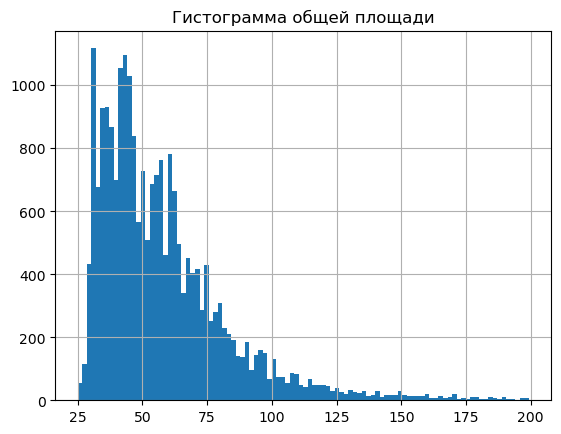

In [20]:
# изучение и описание общей площади
avg_total_area = data['total_area'].mean()
median_total_area = data['total_area'].median()
data['total_area'].hist(bins = 100)
plt.title('Гистограмма общей площади')
plt.show()

По данной гистограмме общей площади видно что:
- большинство значений распределно до значения 100 кв. м
- среднее значение в total_area = 58 кв. м
- медианное знаечние в total_area = 52 кв. м
- так же что на графике два больших пика в районе 32 кв. м и 44 кв. м
- и по разнице в средней и медиане, да и по графику видно что у нас правосторонняя ассиметрия 

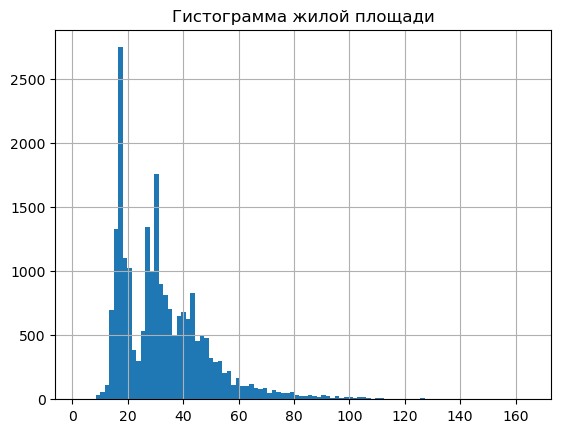

In [21]:
# изучение и описание жилой площади
avg_living_area = data['living_area'].mean()
median_living_area = data['living_area'].median()
data['living_area'].hist(bins = 100)
plt.title('Гистограмма жилой площади')
plt.show()

По данной гистограмме жилой площади можно заметить:
- большинство значений распределено примерно от 14 кв.м до 60 кв. м
- среднее значение в living_area = 33 кв. м
- медианное знаечние в living_area = 30 кв. м
- на этом графике мы тоже имеем два пика (примерные значения)
    - первый - 18 кв. м 
    - второй - 30 кв. м
- так же как и в первой гистограмме, тут тоже мы имеем более правостороннюю ассиметрию 

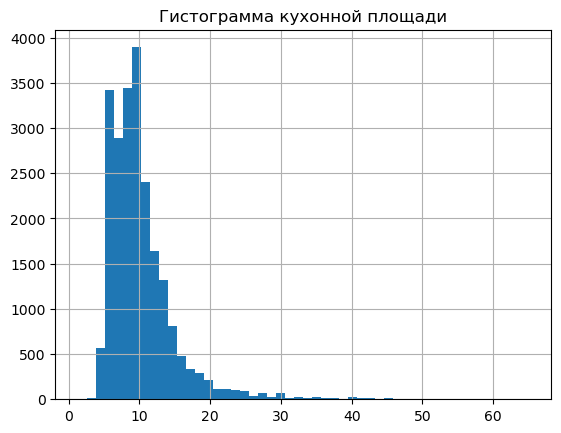

Средняя по kitchen_area = 10
Медианное значение по kitchen_area = 9.0


In [22]:
# изучение и описание кухонной площади
avg_kitchen_area = data['kitchen_area'].mean()
median_kitchen_area = data['kitchen_area'].median()
data['kitchen_area'].hist(bins = 50)
plt.title('Гистограмма кухонной площади')
plt.show()
print(f'Средняя по kitchen_area = {round(avg_kitchen_area)}')
print(f'Медианное значение по kitchen_area = {median_kitchen_area}')

В данном случае гистограммы кухонной площади можно сказать следующее:
- большинство значений распределено примерно от 5 кв.м до 15 кв. м
- среднее значение в  kitchen_area = 10 кв. м
- медианное знаечние в kitchen_area = 9 кв. м
- так же как и в total_area гистограмме, тут тоже мы имеем более правостороннюю ассиметрию, в целом living_area и kitchen_area очень сильно взаимосвязанны с total_area  

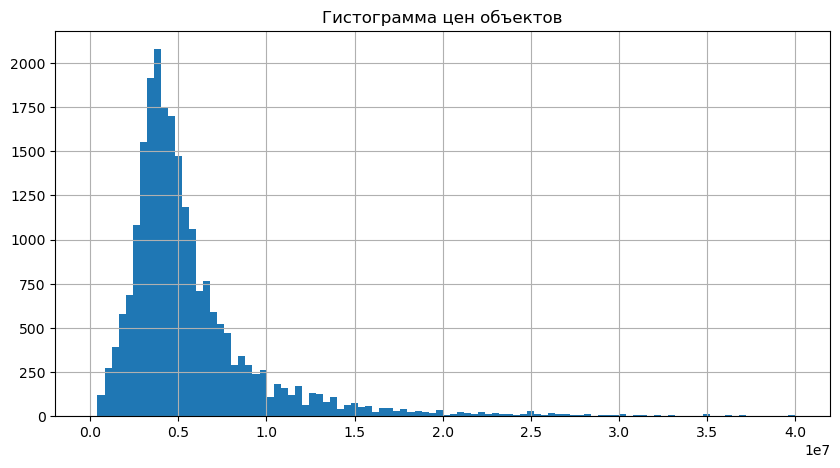

Средняя по last_price = 5776064
Медианное значение по last_price = 4600000.0


In [23]:
# изучение и описание цен объекта
avg_price = data['last_price'].mean()
median_price = data['last_price'].median()
data['last_price'].hist(bins = 100,figsize = (10,5))
plt.title('Гистограмма цен объектов')
plt.show()
print(f'Средняя по last_price = {round(avg_price)}')
print(f'Медианное значение по last_price = {median_price}')

По гистограмме цены обьекта можно сделать выводы:
- большинство значений распределено примерно до 10 млн рублей
- среднее цена в наших объявлениях 5.776.064 рублей
- медианная цена в наших объявлениях 4.600.000 рублей
- В данной гистограмме у нас имеется так же правосторонняя ассиметрия, можно предположить что  цена оббьекта имеет положитнльную корреляцию с площадью, что в принципе логично

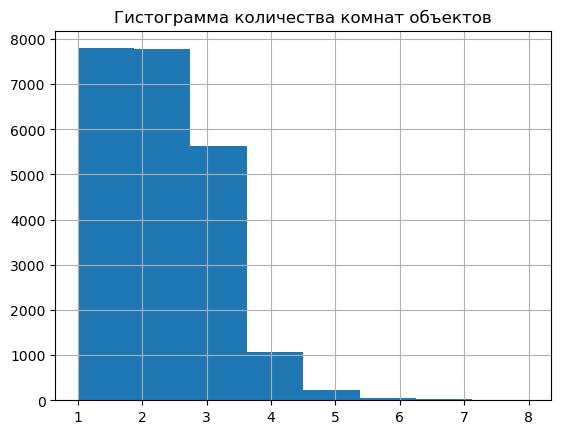

Средняя по rooms = 2
Медианное значение по rooms = 2.0


In [24]:
# изучение и описание количества комнат объекта
avg_rooms = data['rooms'].mean()
median_rooms = data['rooms'].median()
data['rooms'].hist(bins = 8)
plt.title('Гистограмма количества комнат объектов')
plt.show()
print(f'Средняя по rooms = {round(avg_rooms)}')
print(f'Медианное значение по rooms = {median_rooms}')

По этой гистограммеможно сказать что:
- большинство обьявленийимеют до 4 комнат
- по показателю количества комнат у на средняя и медиана совпадают, они равны 2 комнатам
- так же есть небольшое количество обьявление (примерно менее 500) более 5 и менее 8 комнат

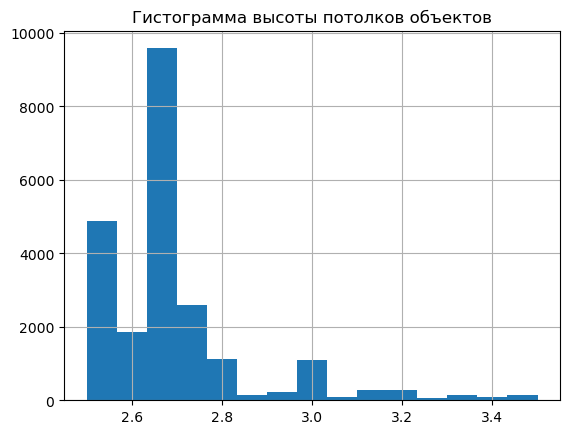

In [25]:
# изучение и описание высоты потолков
data['ceiling_height'].hist(bins = 15)
plt.title('Гистограмма высоты потолков объектов')
plt.show()

По гистограмме высо3003ты потолков обьекта можно сделать выводы:
- большинство обьявлений имеют до 2.8 м и отдельно можно отметить 3 м высоту потолков
- если брать средние и медиану тот они равны
    - средняя высота 2.68 м
    - медианная 2.65 м

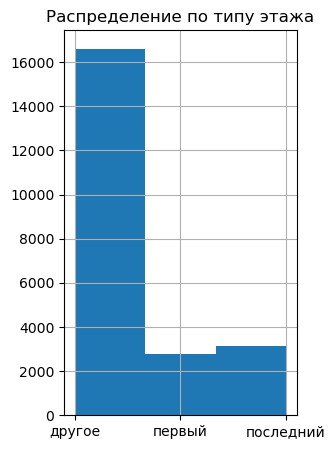

In [26]:
# изучение и описание типа этажа в обьявлениях
data['floor_type'].hist(bins = 3, figsize = (3, 5))
plt.title('Распределение по типу этажа')
plt.show()

    
|Тип этажа  |количество|
|:----------|----------|
|другое     |   16.615 |  
|последний  |   3.148  |
|первый     |   2.805  |
    

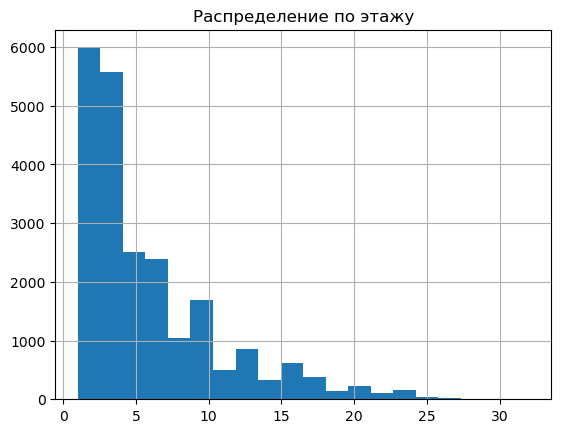

In [27]:
# изучение и описание общего количества этажей в доме 
data['floor'].hist(bins = 20)
plt.title('Распределение по этажу')
plt.show()

    В данном случае тоже думаю проще описать таблицей
    
|этаж |количество|этаж |количество|этаж |количество|этаж |количество|
|:----|----------|-----|----------|-----|----------|-----|----------|
|1    |   2805   |  9  |   1020   | 17  |   209    | 25  |   44     |
|2    |   3190   |  10 |   670    | 18  |   166    | 26  |   21     | 
|3    |   2916   |  11 |   500    | 19  |   139    | 27  |   8      |
|4    |   2653   |  12 |   503    | 20  |   107    | 28  |   0      |
|5    |   2509   |  13 |   356    | 21  |   114    | 29  |   0      |
|6    |   1226   |  14 |   326    | 22  |   105    | 30  |   0      |
|7    |   1162   |  15 |   326    | 23  |   93     | 31  |   0      |
|8    |   1041   |  16 |   299    | 24  |   59     | 32  |   1      |

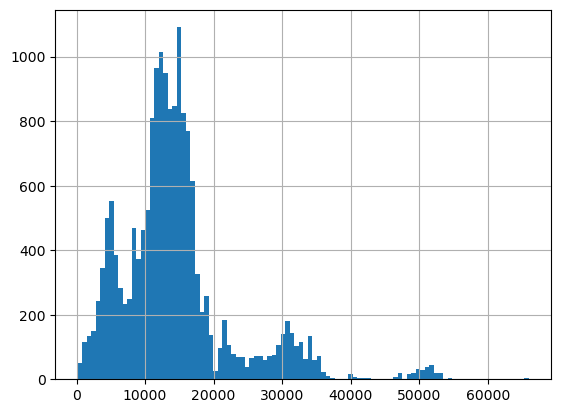

In [28]:
# расстояние до центра города в метрах 
avg_distance_center = data['cityCenters_nearest'].mean()
median_distance_center = data['cityCenters_nearest'].median()
data['cityCenters_nearest'].hist(bins = 100)
plt.show()

По данной гистограммме можно отметить:
- большинство обьявлений находятся на расстоянии до 20000 м (20 км)
- если брать средние и медиану тот они равны
    - средняя высота 14432 м
    - медианная 13235 м
- на гистограмме есть так же 2 группы распределений в районе 30000 м и 50000 м

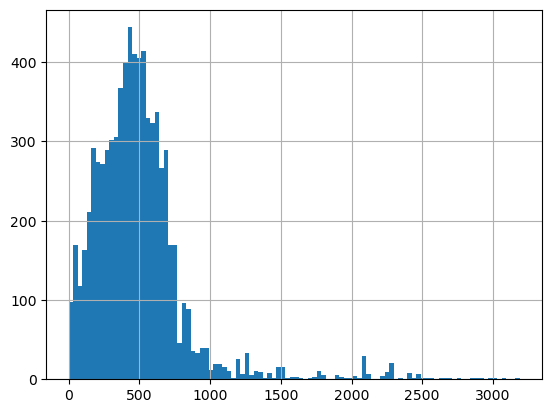

In [29]:
# расстояние до ближайшего парка
avg_distance_park = data['parks_nearest'].mean()
median_distance_park = data['parks_nearest'].median()
data['parks_nearest'].hist(bins = 100)
plt.show()

Тут можно отметить что, большинство обьвлений имеют парк в районе 1 км, среднее расстояние до парка 494 м, медианное 456 м, но так же мы имеем объявления где расстояние до парка до 3000 м

In [30]:
array = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', \
         'floor', 'floor_type', 'cityCenters_nearest', 'parks_nearest']
for i in array:
    print(data[i].describe())

count    22568.000000
mean        57.921187
std         25.283648
min         25.070000
25%         40.100000
50%         52.000000
75%         68.100000
max        199.200000
Name: total_area, dtype: float64
count    22568.000000
mean        33.128660
std         16.684772
min          2.000000
25%         19.000000
50%         30.000000
75%         41.900000
max        164.700000
Name: living_area, dtype: float64
count    22568.000000
mean        10.247063
std          5.021321
min          1.300000
25%          7.000000
50%          9.000000
75%         11.710000
max         65.000000
Name: kitchen_area, dtype: float64
count    2.256800e+04
mean     5.776064e+06
std      4.252110e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.999000e+07
Name: last_price, dtype: float64
count    22568.000000
mean         2.044133
std          0.968463
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max    

Так же вывел по каждому исседуемому столбцу методом describe основные статистики, где можно просмотреть такие показатели как:
    - количество
    - средняя
    - стандартное отклонение
    - минимальное значение
    - максимальное значение
    - первый, второй и третий квартили

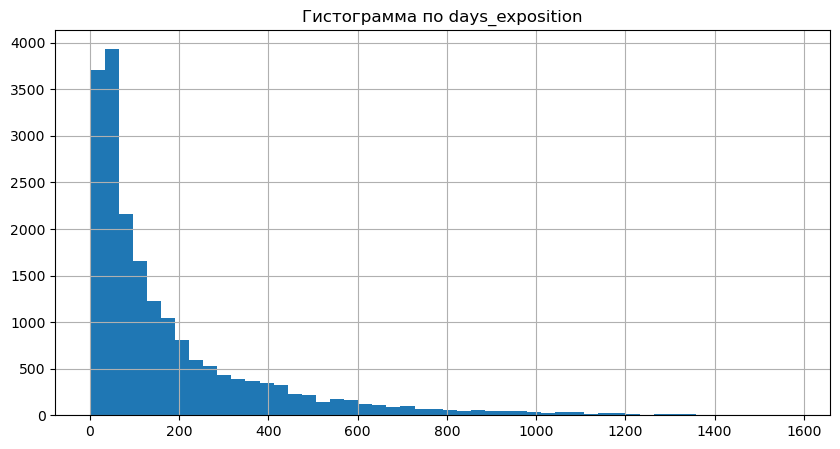

In [31]:
# Анализ продаж
day_exp = data.dropna(subset = ['days_exposition'])
day_exp['days_exposition'].hist(bins = 50,figsize = (10, 5))
plt.title('Гистограмма по days_exposition')
plt.show()

На данной гистограме видно что большинство квартир продаются в течении 400 дней
    
Если брать продажи по квартилям то (думаю по ним можно и сделать категоризацию быстро - средне и долго):
    
- 25% квартир до 45 дней (быстрые продажи <= 45 дней)
- 50% квартир до 95 дней (45 дней > средние продажи < 95 дней)
- 75% квартир до 229 дней (95 дней > долгие продажи)
    
Среднее в этом столбце равно 180 дней, хотя, как написано выше, медиана равно 95 дней

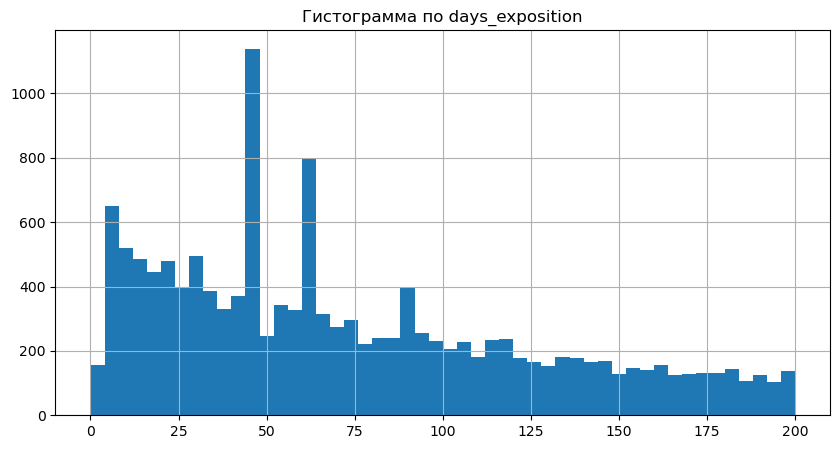

In [33]:
# Код ревьюера
day_exp['days_exposition'].hist(bins = 50, figsize = (10, 5), range = (0, 200))
plt.title('Гистограмма по days_exposition')
plt.show()

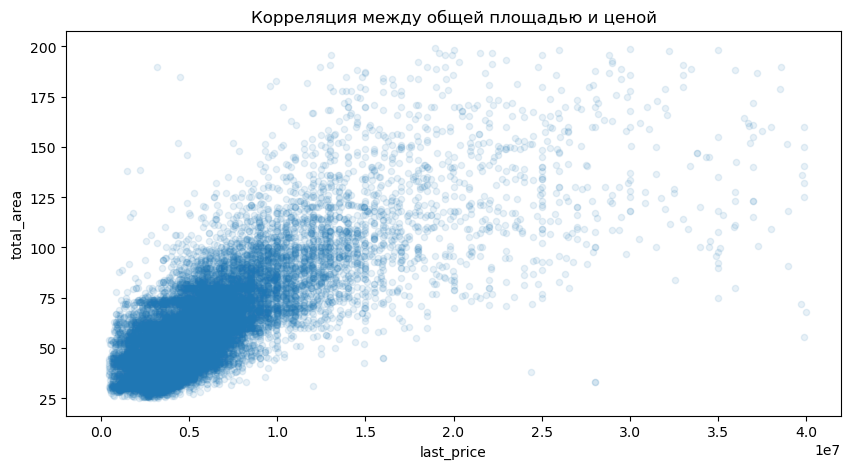

In [34]:
# определение факторов которые влияют на цену квартиры
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, figsize = (10, 5))
plt.title('Корреляция между общей площадью и ценой')
plt.show()

Корреляция между ценой и общей площадью положителен и равен 0.77, это довольно сильная взаимосвязь, а то что он положителен означает что с увеличением одного показателя то и второй будет увеличиваться

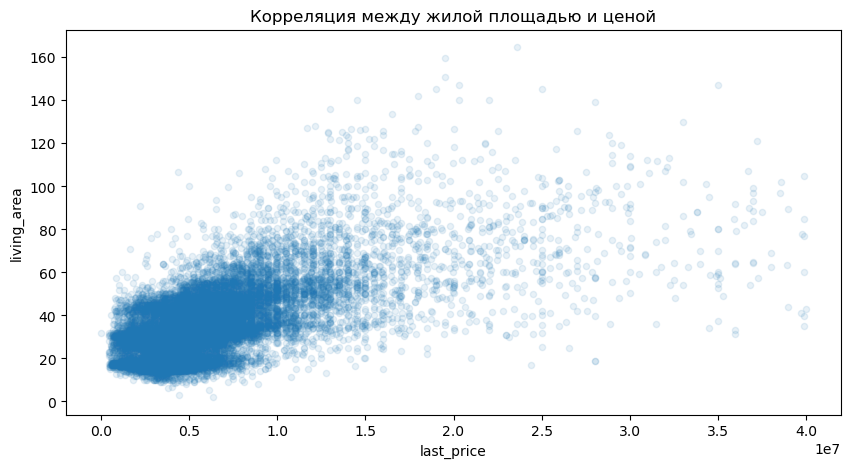

In [35]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, figsize = (10, 5))
plt.title('Корреляция между жилой площадью и ценой')
plt.show()

В данном случае мы тоже можем наблюдать положительную связь, где коэффициент корреляции составляет 0.65

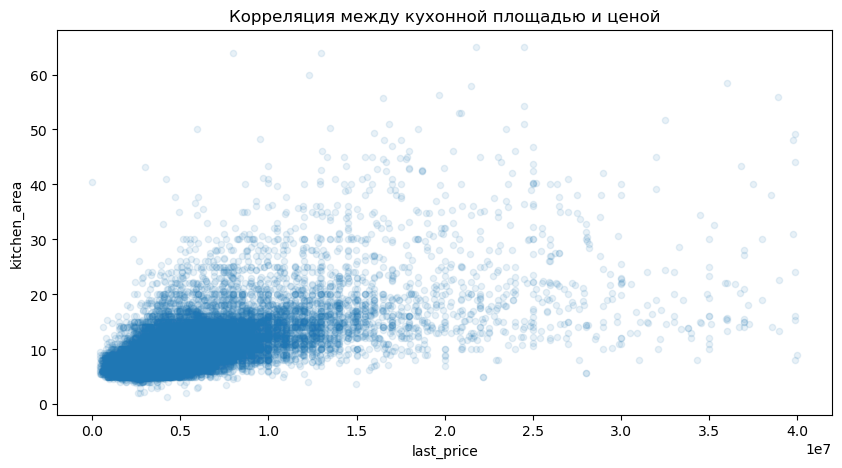

In [36]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, figsize = (10, 5))
plt.title('Корреляция между кухонной площадью и ценой')
plt.show()

Как и в двух примерах выше, в данном случае у нас так же положительная корреляционная связь с коэффициентом равным 0.59, из всех показателей связанных с площадью самая сильная взаимосвязь между общей и ценой, тут конечно можно сказать что чем выше площпдь кухни или жилая площадь то тем выше и общая и соответсвенно цена, но видимо это между кухонной и жилой это бывает чуть реже, чем с общей

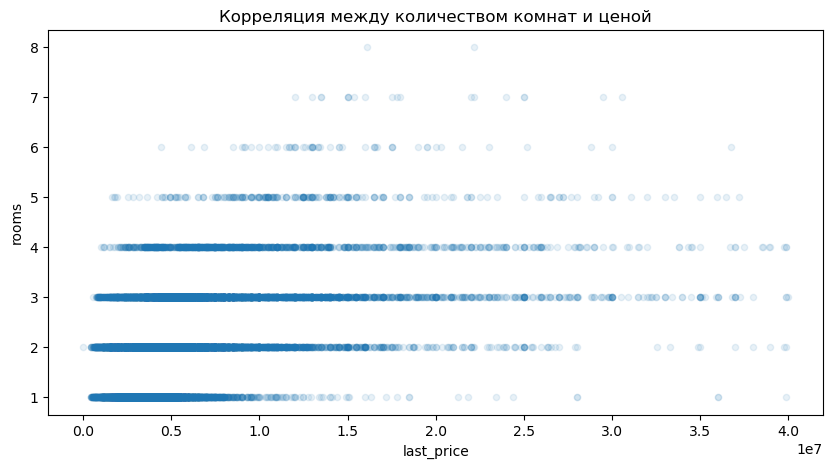

,rooms,last_price
0,1,3839924
1,2,5454840
2,3,7529010
3,4,10617935
4,5,13374962
5,6,14843033
6,7,18944210
7,8,19145000


In [37]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, figsize = (10, 5))
plt.title('Корреляция между количеством комнат и ценой')
plt.show()
rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = 'mean')
rooms['last_price'] = rooms['last_price'].astype(int)
rooms = rooms.reset_index()
rooms.head(8)

В данном случае, у нас есть взаимосвязь, коэффициент корреляции равен 0.47. По графику можно сказать что с увеличением количества комнат, растет и цена на квартиры но не так сильно, так же с увеличением комнат в целом растет и диапазон цен (только диапазон). Еще одно наблюдение что свыше 30 млн, самое большое количество объявление 3-х комтнатных квартир, так же помимо гистограммы добавил сводную таблицу, думаю там можно заметить положительную корреляционую связь

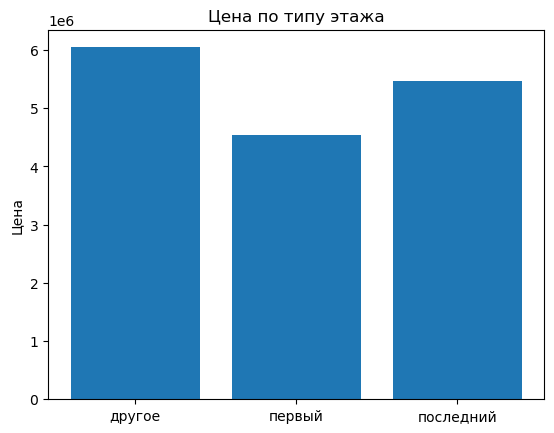

In [38]:
floor_types = data.pivot_table(index='floor_type', values='last_price', aggfunc='mean')
floor_types['last_price'] = floor_types['last_price'].astype(int)
floor_types = floor_types.reset_index()
plt.bar(floor_types['floor_type'], floor_types['last_price'])
plt.ylabel('Цена')
plt.title('Цена по типу этажа')
plt.show()

В данном случае мы имеем категориальный показатель, и по нему у меня не получислось, вместо этого я сделал гистограмму и сводную таблицу
    
    
|Тип этажа  |средняя цена|
|:----------|------------|
|другое     |   6045385  |  
|последний  |   5466884  |
|первый     |   4541366  |

как мы видим, квартиры первого этажа имеют самый низкий средний показатель, почти меньше на 1 млн чем последний и на 1.5 млн чем тип этажа другое

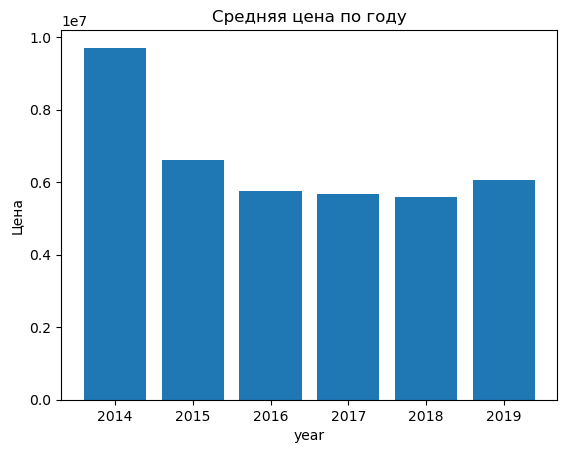

In [39]:
year = data.pivot_table(index='year', values='last_price', aggfunc='mean')
year['last_price'] = year['last_price'].astype(int)
year = year.reset_index()
plt.bar(year['year'], year['last_price'])
plt.ylabel('Цена')
plt.xlabel('year')
plt.title('Средняя цена по году')
plt.show()

Распределение по году так же, я решил сделать гистограмму и добавить таблицу, тут доаольно странная ситуация, средняя цена обьявлений в 2014 году был самым высоким, после него идут цены 2015 и 2019 года, и на третьем месте показатели года с 2016-2018, это кстати очень интересная информация, думаю надо по этому можно проверить, может у нас изменился тип жилья за это время, или любые другие причины, но стоит проверить эту инфу
    
    
|year       |средняя цена|
|:----------|------------|
|2014       |   9712204  |  
|2015       |   6626292  |
|2016       |   5767040  |
|2017       |   5680672  |  
|2018       |   5594875  |
|2019       |   6069347  |

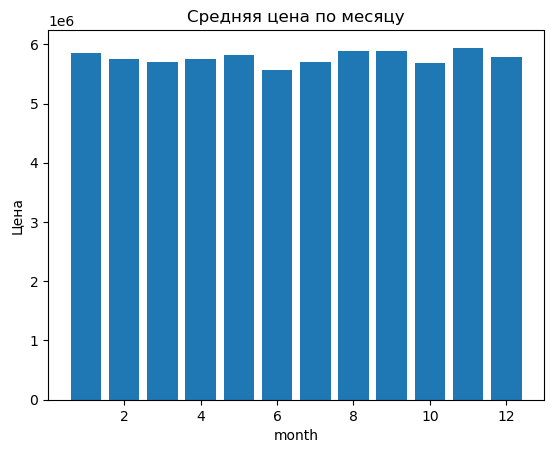

In [41]:
month = data.pivot_table(index='month', values='last_price', aggfunc='mean')
month['last_price'] = month['last_price'].astype(int)
month = month.reset_index()
plt.bar(month['month'], month['last_price'])
plt.ylabel('Цена')
plt.xlabel('month')
plt.title('Средняя цена по месяцу')
plt.show()

Распределение по месяцу размещения обьявления не так сильно влияет на цену в объявлениях

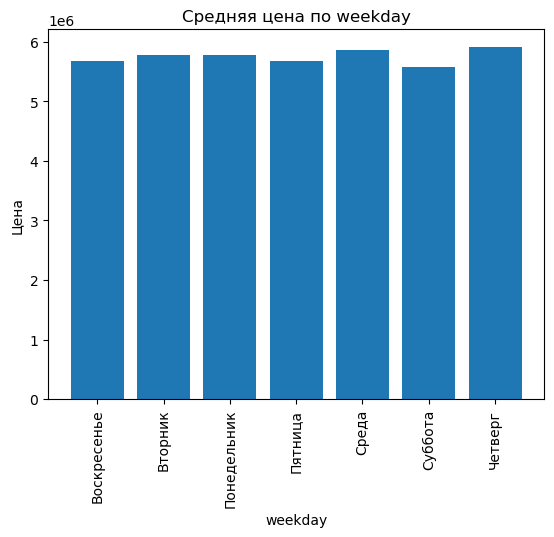

,weekday,last_price
0,Воскресенье,5672352
1,Вторник,5780367
2,Понедельник,5781900
3,Пятница,5681694
4,Среда,5866291
5,Суббота,5566525
6,Четверг,5908164


In [42]:
weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
weekday['last_price'] = weekday['last_price'].astype(int)
weekday = weekday.reset_index()
plt.bar(weekday['weekday'], weekday['last_price'])
plt.ylabel('Цена')
plt.xlabel('weekday')
plt.xticks(rotation=90)
plt.title('Средняя цена по weekday')
plt.show()
weekday


В данном случае распределения по дню недели, тоже сложно отметить взаимосвязь, но можно сказать что в четверг размещенные обьявления имеют самую высокую среднюю цену

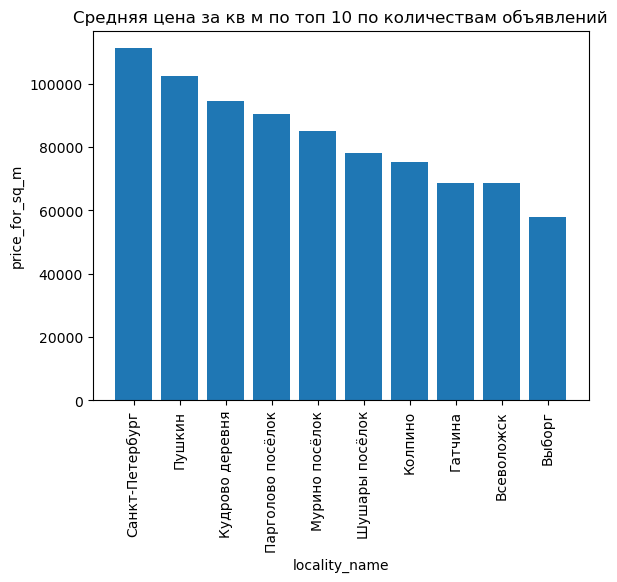

,locality_name,price_for_sq_m
8,Санкт-Петербург,111141
7,Пушкин,102565
4,Кудрово деревня,94690
6,Парголово посёлок,90479
5,Мурино посёлок,85042
9,Шушары посёлок,78023
3,Колпино,75258
2,Гатчина,68799
0,Всеволожск,68655
1,Выборг,57850


In [43]:
# Анализ 10 населенных пунктов по количеству обьявлений  и средняя цена их
# Самые высокие цены за квадратный метр в Санкт - Петербурге, самая низкая средняя цена за квадратный метр в Выборге
# Разница почти в два раза
top_ten_name = data.groupby('locality_name')['locality_name'].count().sort_values(ascending = False).head(10).index
top_ten = data[data['locality_name'].isin(top_ten_name)]
top_ten = top_ten.groupby('locality_name')['price_for_sq_m'].mean()
top_ten = pd.DataFrame(top_ten).reset_index()
top_ten['price_for_sq_m'] = top_ten['price_for_sq_m'].astype(int)
top_ten = top_ten.sort_values(by = 'price_for_sq_m', ascending = False)
plt.bar(top_ten['locality_name'], top_ten['price_for_sq_m'])
plt.ylabel('price_for_sq_m')
plt.xlabel('locality_name')
plt.xticks(rotation=90)
plt.title('Средняя цена за кв м по топ 10 по количествам объявлений')
plt.show()
top_ten.head(10)

Топ 10 населенных пунктов по количеству обявлений и средняя цена за кв.м  
  
Как видно, лидирующую позицию занимает Санкт-Петербург, и замыкает нашу 10-ку Выборг. Между ними разница почти в 2 раза 111141 и 57850

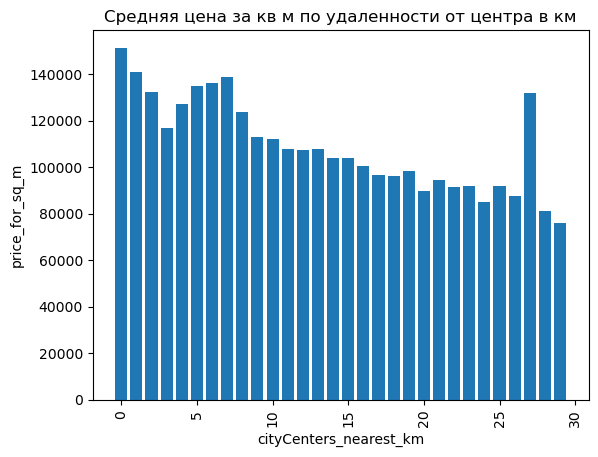

,cityCenters_nearest_km,price_for_sq_m
0,0,151384.954159
1,1,141193.057819
2,2,132224.923786
3,3,116881.165217
4,4,127199.133003
5,5,135129.879708
6,6,136391.425371
7,7,138751.203228
8,8,123976.928891
9,9,113025.390428


In [44]:
# Анализ по 'locality_name' == 'Санкт-Петербург'

SP_data = data[data['locality_name'] == 'Санкт-Петербург']
SP_data = SP_data.dropna(subset = ['cityCenters_nearest_km'])
SP_data['cityCenters_nearest_km'] = SP_data['cityCenters_nearest_km'].astype(int)

SP_center_nearest = SP_data.groupby('cityCenters_nearest_km')['price_for_sq_m'].mean()
SP_center_nearest = pd.DataFrame(SP_center_nearest).reset_index()

plt.bar(SP_center_nearest['cityCenters_nearest_km'], SP_center_nearest['price_for_sq_m'])
plt.ylabel('price_for_sq_m')
plt.xlabel('cityCenters_nearest_km')
plt.xticks(rotation=90)
plt.title('Средняя цена за кв м по удаленности от центра в км')
plt.show()
SP_center_nearest

Как мы видим на этом граффике и таблице, наблюдается такая тенденция, что чем ближе к центру тем выше и цена, конечно же можно наблюдать и отдельные пики  с 5-7 км, и на 27 км, тут могут быть сного факторов, может это отдельный элитный район и там другой класс жилья, или это бизнес центр, и там высокий спрос на жилье, думаю при детельном изучении как города так и датафрема можно выяснить причины

### Напишите общий вывод

<div class="alert-info" style="padding: 20px; border-radius: 10px">
   ОБЩИЙ ВЫВОД  
    
1. Изначально датафрейм содержал 23699 в процессе предобработки данных у нас осталось 22568 строк,
   На этапе сбора информации следует:
    - минимизировать влияние человеческого фактора при вводе данных, либо некторые поля сделать обязательными, либо сделать фильтр или выпадающий список для выбора двнных пользователем, это сократит количество ошибок, 
    - так же когда выбираем недвижимость в Спб, не помешало бы указать район Спб, так как будет проще пользователям (те кто смотрят обьявление) делать фильтрацию для быстрого поиска
    - так же не помешало бы добавить дополнительные параметры, такие как - количество сан узлов, класс жилья, информация по школам/садикам поблизости, информация по ТЦ или другим крупным обьектам, наличие паркинга и т д

2. Так же для анализа были добавлены такие значения как:
   - цена одного квадратного метра;
   - день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры (значения — «первый», «последний», «другой»);

3. При анализе основных показателей нами было замечено 

    - Если брать по площади, то большинство значений распределено до 100 кв (общая), до 60 кв (жилая), до 10 кв (кухоная), а их средние 58 кв (общая), 33 кв (жилая), 10 кв (кухонная)
    
    - Средняя цена - 5.776.064 рублей, медианная (значит что половина дороже, и половина дешевле чем) 4.600.000 рублей
    
    - Большинство обьявлений имеет до 4 комнат, средняя и медиана в этом столбце совпадают и равны 2
    
    - Если смотреть по типу этажа, то лидирует ти этажа "другое" 16615, кстати в этом типе и самая высокая средняя 6045385, на втором месте (и по цене тоже) "последний" 3148, 5466884 руб, и на последнем месте "первый" 2805, 4541366 руб
    
    
4. Если говорить о факторах которые влияют на цену квартиры
    
    - То хочется отметить площадь, так же и жилая и кухонная, имеют высокую корреляцию от 0.57 (кухни) до 0.77 (общая)
    
    - Так же чуть слабо количество комнат и тип этажа (не особо любят первый и последний тип)
    
    - Такие факторы как год, месяц и день недели, не дали нам какую либо взаимосвязь, только если год, который наоборот, если смотреть на граффик то можно даже сказать что с каждым годом жилье становится дешевле (что очень сомнительно), а в 2014 был самый пик цен
    
5. Вывели топ населенных пунктов с наибольшими количествами объявлений так же просчитали цену за кв м, по цене за кв м лидирует логично Санкт-Петербург со средней ценой 111141 руб , а замыкает нашу десятку Выборг с ценой 57850 за кв м.

6. Так же провели анализ по Санкт - Петербургу, мы проверили есть ли разница в цене от расположения. Да, есть, чем ближе к центру тем дороже
    
Более детально рассмотреть отчеты, графики и таблицы можете выше!  
   

    
</div>